In [1]:
import onnxruntime as rt
import numpy as np
import awkward as ak
from matplotlib import pyplot as plt
from coffea.util import load

from ml_pytorch.defaults.dnn_input_variables import  bkg_morphing_dnn_input_variables
from ml_pytorch.utils.tools import create_DNN_columns_list


/work/mmalucch/micromamba/envs/ML_pytorch/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
input = "/work/tharte/datasets/data_samples/data_full_2022/merged/output_all.coffea"

o = load(f"{input}")
sample=list(o["columns"].keys())[0]
dataset=list(o["columns"][sample].keys())[0]
category=list(o["columns"][sample][dataset].keys())[0]
category="2b_control_region_preWRun2"
category="4b_control_regionRun2"
print(sample,dataset, category)
col=o["columns"][sample][dataset][category]


for k in col.keys():
    print(k)
    col[k]=col[k].value#[col[k].value!=-999]


DATA_JetMET_JMENano_E_skimmed DATA_JetMET_JMENano_2022_postEE_EraE 4b_control_regionRun2
weight
HiggsLeadingRun2_dR
HiggsLeadingRun2_eta
HiggsLeadingRun2_pt
HiggsLeadingRun2_mass
HiggsLeadingRun2_helicityCosTheta
HiggsLeadingRun2_phi
HiggsSubLeadingRun2_dR
HiggsSubLeadingRun2_eta
HiggsSubLeadingRun2_pt
HiggsSubLeadingRun2_mass
HiggsSubLeadingRun2_helicityCosTheta
HiggsSubLeadingRun2_phi
HHRun2_dR
HHRun2_dPhi
HHRun2_eta
HHRun2_Costhetastar_CS
HHRun2_pt
HHRun2_mass
HHRun2_dEta
JetGoodFromHiggsOrderedRun2_N
JetGoodFromHiggsOrderedRun2_eta
JetGoodFromHiggsOrderedRun2_pt
JetGoodFromHiggsOrderedRun2_mass
JetGoodFromHiggsOrderedRun2_phi
add_jet1ptRun2_eta
add_jet1ptRun2_pt
add_jet1ptRun2_mass
add_jet1ptRun2_phi
events_HT
events_sigma_over_higgs2_reco_massRun2
events_sigma_over_higgs1_reco_massRun2
events_era
events_dR_max
events_dR_min


In [3]:
list_variables=create_DNN_columns_list(True, bkg_morphing_dnn_input_variables)

list_column=[]
for k in list_variables:
    print(k)
    if 'JetGoodFromHiggsOrdered' in k:
        print( col['JetGoodFromHiggsOrderedRun2_N'])
        #unflatten
        col_k_unflatten=ak.unflatten(col[k], col['JetGoodFromHiggsOrderedRun2_N'])
        print(col_k_unflatten)
        for i in range(4):
            list_column.append(col_k_unflatten[:,i])
            print(col_k_unflatten[:,i])
    else:
        list_column.append(col[k])
print(list_column)
input_data = np.array(np.stack(list_column, axis=1), dtype=np.float32)
print(input_data, input_data.shape)

events_era
HiggsLeadingRun2_pt
HiggsLeadingRun2_eta
HiggsLeadingRun2_phi
HiggsLeadingRun2_mass
HiggsSubLeadingRun2_pt
HiggsSubLeadingRun2_eta
HiggsSubLeadingRun2_phi
HiggsSubLeadingRun2_mass
events_HT
HiggsLeadingRun2_dR
HiggsSubLeadingRun2_dR
events_dR_min
events_dR_max
HiggsLeadingRun2_helicityCosTheta
HiggsSubLeadingRun2_helicityCosTheta
HHRun2_Costhetastar_CS
HHRun2_mass
HHRun2_pt
HHRun2_eta
HHRun2_dR
HHRun2_dPhi
HHRun2_dEta
JetGoodFromHiggsOrderedRun2_pt
[4 4 4 ... 4 4 4]
[[206, 29.1, 91.7, 73.9], [57.9, 38.3, ... 145, 59.6], [62.2, 58.3, 80.3, 35.4]]
[206, 57.9, 113, 160, 121, 167, 105, 106, ... 277, 307, 121, 137, 194, 137, 62.2]
[29.1, 38.3, 54, 117, 85.1, 119, 37.7, ... 44.5, 31.9, 115, 117, 69.1, 76.4, 58.3]
[91.7, 94.5, 50.5, 66.8, 60.5, 110, 69.5, ... 221, 235, 163, 112, 144, 145, 80.3]
[73.9, 67.9, 44.8, 44.2, 30.1, 51.7, 64.8, ... 29.1, 64.9, 27.3, 29.2, 59.6, 35.4]
JetGoodFromHiggsOrderedRun2_eta
[4 4 4 ... 4 4 4]
[[1.35, 1.85, 1.74, 1.9], [1, -0.847, ... -0.82], [2.08, 

In [4]:
onnx_name='/work/tharte/datasets/ML_pytorch/out/merged_2022_AN_oversample/state_dict/model_44_state_dict.onnx'

session = rt.InferenceSession(
    onnx_name,
    providers=rt.get_available_providers()
)
# print the input/putput name and shape
input_name=[input.name for input in session.get_inputs()]
output_name=[output.name for output in session.get_outputs()]
print("Inputs name:", input_name)
print("Outputs name:", output_name)

input_shape=[input.shape for input in session.get_inputs()]
output_shape=[output.shape for output in session.get_outputs()]
print("Inputs shape:", input_shape)
print("Outputs shape:", output_shape)

input_example = {input_name[0]: input_data}

output = session.run(output_name, input_example)[0]

Inputs name: ['InputVariables']
Outputs name: ['Sigmoid']
Inputs shape: [['batch_size', 45]]
Outputs shape: [['batch_size', 2]]


In [5]:
print(output)

[[3.53987068e-01 6.46012902e-01]
 [9.99997377e-01 2.65266544e-06]
 [1.45895261e-04 9.99854088e-01]
 ...
 [9.75022505e-15 1.00000000e+00]
 [9.99717295e-01 2.82717083e-04]
 [1.17549926e-01 8.82450044e-01]]


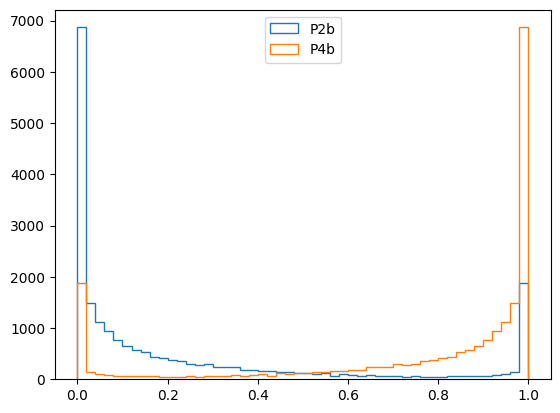

In [11]:
#plot histogram
plt.hist(output[:,0], bins=50, histtype='step', label='P2b')
plt.hist(output[:,1], bins=50, histtype='step', label='P4b')
plt.legend()

In [7]:
output_2b = output

In [8]:
# output_2b = output

In [9]:
#plot histograms
plt.hist(output_4b, bins=50, histtype='step')
plt.hist(output_2b, bins=50, histtype='step')

NameError: name 'output_4b' is not defined